In [92]:
import pandas as pd
import numpy as np
from matplotlib import animation
from matplotlib import pyplot as plt
from mplsoccer import Sbopen, Pitch

parser = Sbopen()

In [110]:
df_competition = parser.competition()
df_competition[df_competition.competition_name == 'Premier League'][['competition_id', 'season_id']]

,competition_id,season_id
39,2,44


In [115]:
df_games = parser.match(competition_id=2, season_id=44)
df_games.home_team_name.unique()

df_games[df_games.home_team_name == 'Manchester City'][['match_id', 'match_date', 'home_team_name', 'away_team_name']]

,match_id,match_date,home_team_name,away_team_name
16,3749454,2003-08-31,Manchester City,Arsenal


In [182]:
df_event, df_related, df_freeze, df_tactics = parser.event(3749454)
df_event.head(3)

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,sub_type_id,sub_type_name,body_part_id,body_part_name,x,y,outcome_id,outcome_name,under_pressure,counterpress,out,technique_id,technique_name,ball_recovery_recovery_failure,foul_won_defensive,off_camera,aerial_won,pass_switch,pass_cross,dribble_overrun,foul_committed_advantage,foul_won_advantage,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,end_z,shot_key_pass_id,shot_first_time,goalkeeper_position_id,goalkeeper_position_name,pass_deflected,dribble_nutmeg,pass_cut_back,foul_committed_card_id,foul_committed_card_name,block_offensive,pass_goal_assist,foul_committed_offensive,shot_one_on_one,substitution_replacement_id,substitution_replacement_name,bad_behaviour_card_id,bad_behaviour_card_name
0,280436a1-1b6c-49b8-b8e2-cf820b6239da,1,1,00:00:00,0,0,1,0.0,3749454,35,Starting XI,36,Manchester City,1,Regular Play,36,Manchester City,442.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,37358f6f-00e7-45a9-be04-c5c42b521005,2,1,00:00:00,0,0,1,0.0,3749454,35,Starting XI,36,Manchester City,1,Regular Play,1,Arsenal,442.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08eaaf00-7f44-4e49-bf8d-d3c41510357c,3,1,00:00:00,0,0,1,0.0,3749454,18,Half Start,36,Manchester City,1,Regular Play,1,Arsenal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
cols_to_keep = ["id", "period", "timestamp", "minute", "second", "player_id", "x", "y", "type_name", "end_x", "end_y", "end_z", "outcome_name"]
df_event_reduced = df_event[cols_to_keep]
df_event_reduced = df_event_reduced.dropna(subset=['x', 'y'])

typename_to_keep = ["Pass", "Carry", "Dribble", "Shot"]
df_event_reduced = df_event_reduced[df_event_reduced.type_name.isin(typename_to_keep)]
df_event_reduced['end_z'] = df_event_reduced['end_z'].fillna(0)

# replace the end_x and end_y with x and y if the end_x and end_y are null (This happen when event is a Drribble)
df_event_reduced['end_x'] = df_event_reduced['end_x'].fillna(df_event_reduced['x'])
df_event_reduced['end_y'] = df_event_reduced['end_y'].fillna(df_event_reduced['y'])

df_event_reduced["player_id"] = df_event_reduced["player_id"].astype(int).astype(str)

# order the dataframe by period and timestamp ascending
df_event_reduced = df_event_reduced.sort_values(by=["period", "timestamp"], ascending=True)

df_event_reduced.head()

,id,period,timestamp,minute,second,player_id,x,y,type_name,end_x,end_y,end_z,outcome_name
4,ba0b87a1-8ac5-472b-8745-a8747ea408b4,1,00:00:00.533000,0,0,15512,61.0,40.1,Pass,59.1,38.5,0.0,NaN
6,beb2172f-215f-4b9e-aa3f-79b2c3ebdf0d,1,00:00:00.972000,0,0,15516,59.1,38.5,Carry,58.2,40.4,0.0,NaN
7,a71606af-6e55-49b0-9742-2a45b14bf3f9,1,00:00:01.623000,0,1,15516,58.2,40.4,Pass,44.7,68.2,0.0,NaN
9,30545905-1062-40c8-b272-85d73252b54a,1,00:00:03.671000,0,3,40222,44.7,68.2,Carry,43.5,68.8,0.0,NaN
10,4336d3de-1090-4dce-be30-7fb9448a5d60,1,00:00:04.236000,0,4,40222,43.5,68.8,Pass,24.6,50.2,0.0,NaN


In [191]:
def create_reward_column(data):
    r = 0.0
    if data == "Goal":
        r = 10.0
    elif data in ["Incomplete", "Pass Offside", "Blocked", "Off T"]:
        r = -1.0
    return r

df_event_reduced["reward"] = df_event_reduced.outcome_name.apply(create_reward_column)

In [204]:
df_event_reduced.tail()

,id,period,timestamp,minute,second,player_id,x,y,type_name,end_x,end_y,end_z,outcome_name,reward
3325,63f54006-020f-45aa-b857-31b7ed2fffa3,2,00:47:50.620000,92,50,38552,37.9,36.1,Pass,55.2,69.7,0.0,NaN,0.0
3327,3883a90e-7891-4688-b167-b4ef23cb1463,2,00:47:52.511000,92,52,40218,55.2,69.7,Carry,115.8,73.3,0.0,NaN,0.0
3329,0d831ebf-af34-4968-9a60-cd359f817b56,2,00:47:59.156000,92,59,40218,115.8,73.3,Pass,114.7,69.7,0.0,Incomplete,-1.0
3331,9ceefdab-9c22-43c0-a6ef-d20a1afc3bec,2,00:48:23.450000,93,23,24758,120.0,80.0,Pass,112.3,35.0,0.0,NaN,0.0
3334,91b80d0d-a669-49a0-a203-9d38590d3ddf,2,00:48:25.602000,93,25,15399,111.9,35.1,Shot,120.0,39.2,3.4,Off T,-1.0


In [203]:
df_event_reduced.timestamp.min(), df_event_reduced.timestamp.max()


(datetime.time(0, 0, 0, 533000), datetime.time(0, 48, 25, 602000))

In [195]:
df_freeze

,teammate,match_id,id,x,y,player_id,player_name,position_id,position_name,event_freeze_id
0,True,3749454,a8834be7-dfb1-494a-930b-7b88379c45de,103.4,28.9,15512,Sylvain Wiltord,22,Right Center Forward,1
1,True,3749454,a8834be7-dfb1-494a-930b-7b88379c45de,109.0,39.5,38412,Kolo Habib Touré,5,Left Center Back,2
2,True,3749454,a8834be7-dfb1-494a-930b-7b88379c45de,104.5,37.1,40221,Gilberto Aparecido da Silva,9,Right Defensive Midfield,3
3,True,3749454,a8834be7-dfb1-494a-930b-7b88379c45de,113.5,41.2,15515,Patrick Vieira,11,Left Defensive Midfield,4
4,False,3749454,a8834be7-dfb1-494a-930b-7b88379c45de,104.5,38.5,40220,David Sommeil,3,Right Center Back,5
...,...,...,...,...,...,...,...,...,...,...
228,False,3749454,91b80d0d-a669-49a0-a203-9d38590d3ddf,114.3,53.4,15516,Thierry Henry,24,Left Center Forward,12
229,False,3749454,91b80d0d-a669-49a0-a203-9d38590d3ddf,112.1,36.1,40222,Laureano Bisan-Etame Mayer,2,Right Back,13
230,False,3749454,91b80d0d-a669-49a0-a203-9d38590d3ddf,119.7,42.5,12529,Ashley Cole,6,Left Back,14
231,True,3749454,91b80d0d-a669-49a0-a203-9d38590d3ddf,108.1,38.3,40215,Jihai Sun,2,Right Back,15


In [79]:
# load away data
LINK1 = ('https://raw.githubusercontent.com/metrica-sports/sample-data/master/'
         'data/Sample_Game_1/Sample_Game_1_RawTrackingData_Away_Team.csv')
df_away = pd.read_csv(LINK1, skiprows=2)
df_away.sort_values('Time [s]', inplace=True)

# load home data
LINK2 = ('https://raw.githubusercontent.com/metrica-sports/sample-data/master/'
         'data/Sample_Game_1/Sample_Game_1_RawTrackingData_Home_Team.csv')
df_home = pd.read_csv(LINK2, skiprows=2)
df_home.sort_values('Time [s]', inplace=True)

In [80]:
# column names aren't great so this sets the player ones with _x and _y suffixes

def set_col_names(df):
    """ Renames the columns to have x and y suffixes."""
    cols = list(np.repeat(df.columns[3::2], 2))
    cols = [col+'_x' if i % 2 == 0 else col+'_y' for i, col in enumerate(cols)]
    cols = np.concatenate([df.columns[:3], cols])
    df.columns = cols


set_col_names(df_away)
set_col_names(df_home)

In [81]:
df_away.head()

,Period,Frame,Time [s],Player25_x,Player25_y,Player15_x,Player15_y,Player16_x,Player16_y,Player17_x,Player17_y,Player18_x,Player18_y,Player19_x,Player19_y,Player20_x,Player20_y,Player21_x,Player21_y,Player22_x,Player22_y,Player23_x,Player23_y,Player24_x,Player24_y,Player26_x,Player26_y,Player27_x,Player27_y,Player28_x,Player28_y,Ball_x,Ball_y
0,1,1,0.04,0.90509,0.47462,0.58393,0.20794,0.67658,0.46710,0.67310,0.76476,0.40783,0.61525,0.45472,0.38709,0.55960,0.67775,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383,NaN,NaN,NaN,NaN,NaN,NaN,0.45472,0.38709
1,1,2,0.08,0.90494,0.47462,0.58393,0.20794,0.67658,0.46710,0.67310,0.76476,0.40783,0.61525,0.45472,0.38709,0.55960,0.67775,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383,NaN,NaN,NaN,NaN,NaN,NaN,0.49645,0.40656
2,1,3,0.12,0.90434,0.47463,0.58393,0.20794,0.67658,0.46710,0.67310,0.76476,0.40783,0.61525,0.45472,0.38709,0.55960,0.67775,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383,NaN,NaN,NaN,NaN,NaN,NaN,0.53716,0.42556
3,1,4,0.16,0.90377,0.47463,0.58351,0.20868,0.67640,0.46762,0.67279,0.76542,0.40771,0.61505,0.45454,0.38818,0.55974,0.67776,0.55236,0.43313,0.50034,0.94391,0.43644,0.05038,0.37756,0.27473,NaN,NaN,NaN,NaN,NaN,NaN,0.55346,0.42231
4,1,5,0.20,0.90324,0.47464,0.58291,0.21039,0.67599,0.46769,0.67253,0.76564,0.40736,0.61471,0.45426,0.38725,0.55992,0.67791,0.55202,0.43311,0.50017,0.94434,0.43580,0.04977,0.37663,0.27543,NaN,NaN,NaN,NaN,NaN,NaN,0.55512,0.40570


In [82]:
# get a subset of the data (10 seconds)
df_away = df_away[(df_away['Time [s]'] >= 815) & (df_away['Time [s]'] < 825)].copy()
df_home = df_home[(df_home['Time [s]'] >= 815) & (df_home['Time [s]'] < 825)].copy()

In [83]:
# split off a df_ball dataframe and drop the ball columns from the player dataframes
df_ball = df_away[['Period', 'Frame', 'Time [s]', 'Ball_x', 'Ball_y']].copy()
df_home.drop(['Ball_x', 'Ball_y'], axis=1, inplace=True)
df_away.drop(['Ball_x', 'Ball_y'], axis=1, inplace=True)
df_ball.rename({'Ball_x': 'x', 'Ball_y': 'y'}, axis=1, inplace=True)

In [84]:
# convert to long form from wide form
def to_long_form(df):
    """ Pivots a dataframe from wide-form (each player as a separate column) to long form (rows)"""
    df = pd.melt(df, id_vars=df.columns[:3], value_vars=df.columns[3:], var_name='player')
    df.loc[df.player.str.contains('_x'), 'coordinate'] = 'x'
    df.loc[df.player.str.contains('_y'), 'coordinate'] = 'y'
    df = df.dropna(axis=0, how='any')
    df['player'] = df.player.str[6:-2]
    df = (df.set_index(['Period', 'Frame', 'Time [s]', 'player', 'coordinate'])['value']
          .unstack()
          .reset_index()
          .rename_axis(None, axis=1))
    return df


df_away = to_long_form(df_away)
df_home = to_long_form(df_home)

In [85]:
df_away.head()

,Period,Frame,Time [s],player,x,y
0,1,20375,815.0,15,0.52333,0.15093
1,1,20375,815.0,16,0.52972,0.31205
2,1,20375,815.0,17,0.48127,0.45092
3,1,20375,815.0,18,0.38463,0.04628
4,1,20375,815.0,19,0.25890,0.07167


In [86]:
df_ball.head()

,Period,Frame,Time [s],x,y
20374,1,20375,815.00,0.24042,0.11311
20375,1,20376,815.04,0.23729,0.11115
20376,1,20377,815.08,0.23415,0.10919
20377,1,20378,815.12,0.23102,0.10723
20378,1,20379,815.16,0.22789,0.10528


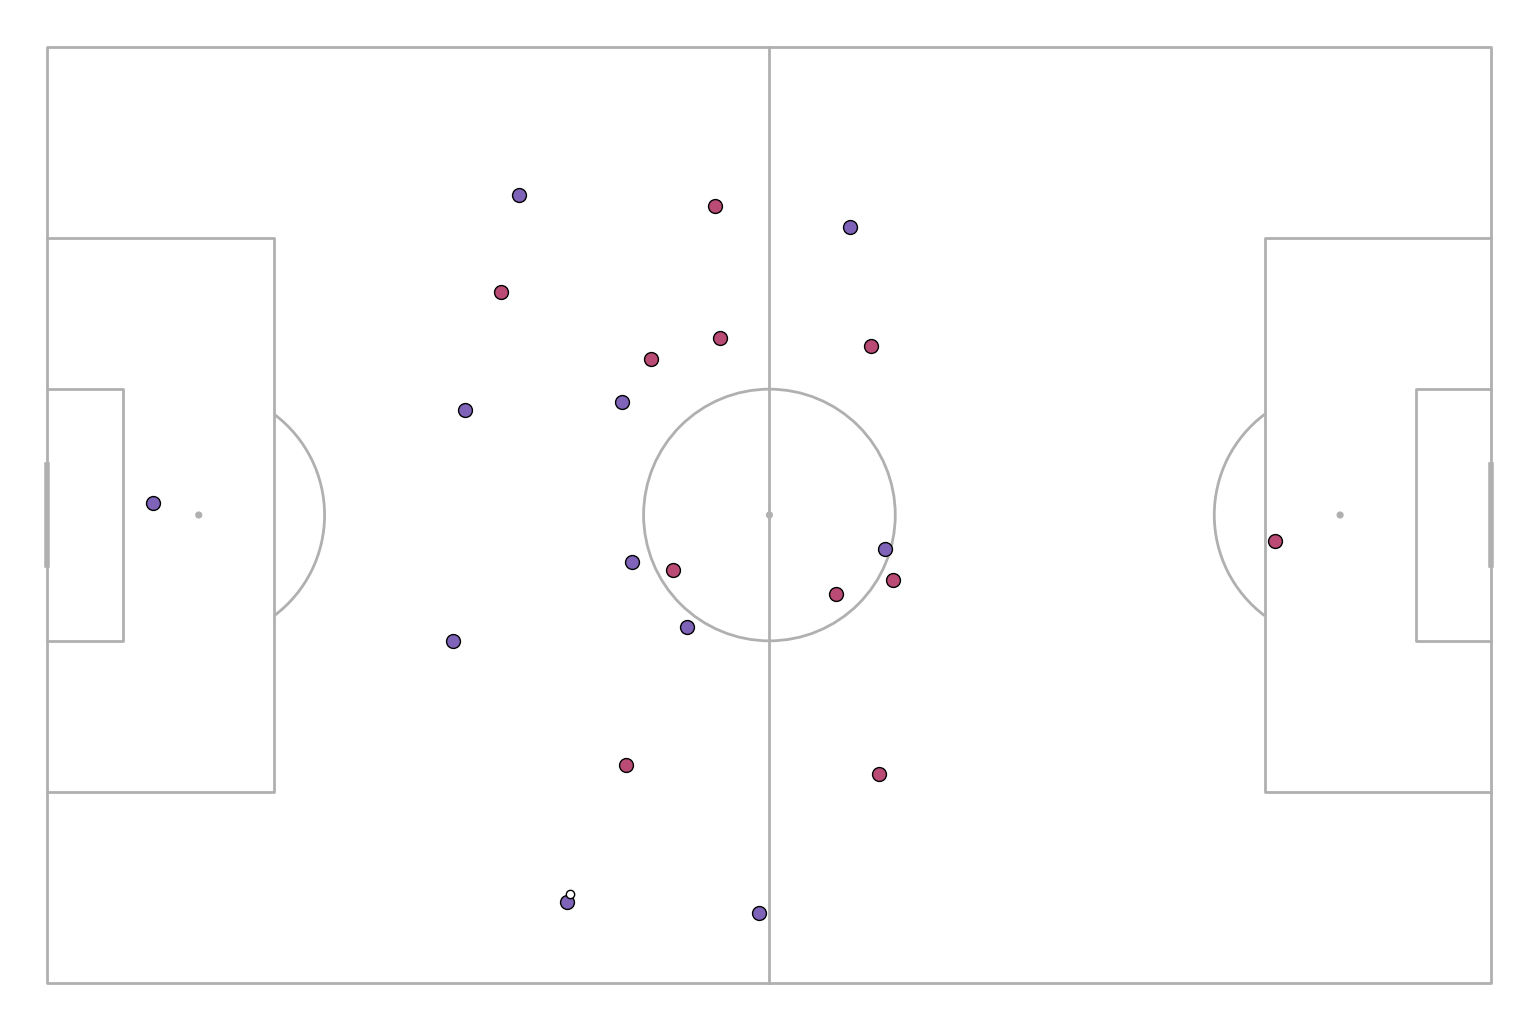

In [100]:
pitch = Pitch(pitch_type='metricasports', goal_type='line', pitch_width=68, pitch_length=105)
fig, ax = pitch.draw(figsize=(16, 10.4))

# then setup the pitch plot markers we want to animate
marker_kwargs = {'marker': 'o', 'markeredgecolor': 'black', 'linestyle': 'None'}
ball, = ax.plot([], [], ms=6, markerfacecolor='w', zorder=3, **marker_kwargs)
away, = ax.plot([], [], ms=10, markerfacecolor='#b94b75', **marker_kwargs)  # red/maroon
home, = ax.plot([], [], ms=10, markerfacecolor='#7f63b8', **marker_kwargs)  # purple


# animation function
def animate(i):
    """ Function to animate the data. Each frame it sets the data for the players and the ball."""
    # set the ball data with the x and y positions for the ith frame
    ball.set_data(df_ball.iloc[i, 3], df_ball.iloc[i, 4])
    # get the frame id for the ith frame
    frame = df_ball.iloc[i, 1]
    # set the player data using the frame id
    away.set_data(df_away.loc[df_away.Frame == frame, 'x'],
                  df_away.loc[df_away.Frame == frame, 'y'])
    home.set_data(df_home.loc[df_home.Frame == frame, 'x'],
                  df_home.loc[df_home.Frame == frame, 'y'])
    return ball, away, home


anim = animation.FuncAnimation(fig, animate, frames=len(df_ball), interval=20, blit=True)

# show animation in jupyter notebook
from IPython.display import HTML
HTML(anim.to_html5_video())


In [104]:
# anim.save('tracking.mp4', fps=60, extra_args=['-vcodec', 'libx264'])

In [61]:
df_event, df_related, df_freeze, df_tactics = parser.event(15973)

In [62]:
df_tactics.head()

,jersey_number,match_id,id,player_id,player_name,position_id,position_name,event_tactics_id
0,1,15973,11098fbd-4121-4503-9ae3-d432d6f647e4,20055,Marc-André ter Stegen,1,Goalkeeper,1
1,20,15973,11098fbd-4121-4503-9ae3-d432d6f647e4,6379,Sergi Roberto Carnicer,2,Right Back,2
2,3,15973,11098fbd-4121-4503-9ae3-d432d6f647e4,5213,Gerard Piqué Bernabéu,3,Right Center Back,3
3,23,15973,11098fbd-4121-4503-9ae3-d432d6f647e4,5492,Samuel Yves Umtiti,5,Left Center Back,4
4,18,15973,11098fbd-4121-4503-9ae3-d432d6f647e4,5211,Jordi Alba Ramos,6,Left Back,5


In [63]:
df_related.head()

,match_id,id,index,type_name,id_related,index_related,type_name_related
0,15973,da19f17e-b2ee-4b3d-a1fb-7854cb0a58b3,3,Half Start,2ff54aec-cd8b-4865-b4ee-e47599b1a872,4,Half Start
1,15973,2ff54aec-cd8b-4865-b4ee-e47599b1a872,4,Half Start,da19f17e-b2ee-4b3d-a1fb-7854cb0a58b3,3,Half Start
2,15973,4ed11d07-9593-4db1-b0b2-eafe3516700a,5,Pass,fcf515c7-ae8b-4421-9708-f477c6f17038,6,Ball Receipt
3,15973,fcf515c7-ae8b-4421-9708-f477c6f17038,6,Ball Receipt,4ed11d07-9593-4db1-b0b2-eafe3516700a,5,Pass
4,15973,2aae747d-e47a-478d-b1f8-746e92f64087,7,Carry,f75423cf-83f4-457e-a410-c6ec9f359118,8,Pass


In [45]:
pd.set_option('display.max_columns', None)
df_event.head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,body_part_id,body_part_name,sub_type_id,sub_type_name,x,y,under_pressure,outcome_id,outcome_name,out,counterpress,pass_deflected,pass_switch,technique_id,technique_name,pass_cross,off_camera,shot_statsbomb_xg,end_z,shot_first_time,goalkeeper_position_id,goalkeeper_position_name,ball_recovery_recovery_failure,pass_assisted_shot_id,pass_shot_assist,shot_key_pass_id,foul_won_defensive,aerial_won,pass_goal_assist,substitution_replacement_id,substitution_replacement_name,foul_committed_offensive,shot_one_on_one,dribble_overrun,block_deflection,pass_cut_back,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,block_save_block,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name
0,e8643796-c76d-44f5-a03d-fa742e051942,1,1,00:00:00,0,0,1,0.00000,69301,35,Starting XI,865,England Women's,1,Regular Play,865,England Women's,4141.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,937f83f8-674d-4c58-81d5-e2101a9f2e60,2,1,00:00:00,0,0,1,0.00000,69301,35,Starting XI,865,England Women's,1,Regular Play,858,Sweden Women's,4231.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,87ba272a-3af0-4fc7-872f-65e8f79fb753,3,1,00:00:00,0,0,1,0.00000,69301,18,Half Start,865,England Women's,1,Regular Play,865,England Women's,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,85d30bef-8b77-405e-bc64-c63ed4d7a6d7,4,1,00:00:00,0,0,1,0.00000,69301,18,Half Start,865,England Women's,1,Regular Play,858,Sweden Women's,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,760528a6-2de2-427f-9795-b2b19819ef1f,5,1,00:00:00.140000,0,0,2,0.16873,69301,30,Pass,865,England Women's,9,From Kick Off,865,England Women's,NaN,10180.0,Ellen White,23.0,Center Forward,4641.0,Francesca Kirby,2.10238,0.442374,1.0,Ground Pass,61.9,40.9,40.0,Right Foot,65.0,Kick Off,60.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Identify actions of the active player

Maybe the action can simply be the ball end location

In [25]:
action_type_names = ["Dribble", "Shot", "Pass", "Carry"]  # from the type_name column

#### Identify states observed by the active player

(inferred from 2D video frames)
- active player, its location
- teammates locations
- opponents locations
- opponents cage location
- own cage location
- the player he is attempting to pass the ball


In [ ]:
states_columns = ["player_id", "x", "y", "pass_recipient_id"]

In [57]:
df_freeze[df_freeze.id == "f158cbc0-a7a1-4787-8f73-15c66ae55764"]

,teammate,match_id,id,x,y,player_id,player_name,position_id,position_name,event_freeze_id
0,True,69301,f158cbc0-a7a1-4787-8f73-15c66ae55764,93.5,18.9,10215,Fridolina Rolfö,21,Left Wing,1
1,True,69301,f158cbc0-a7a1-4787-8f73-15c66ae55764,103.9,15.9,10375,Nilla Fischer,3,Right Center Back,2
2,False,69301,f158cbc0-a7a1-4787-8f73-15c66ae55764,111.1,38.6,10190,Jade Moore,10,Center Defensive Midfield,3
3,False,69301,f158cbc0-a7a1-4787-8f73-15c66ae55764,112.2,43.3,4648,Abbie McManus,5,Left Center Back,4
4,False,69301,f158cbc0-a7a1-4787-8f73-15c66ae55764,113.1,45.5,10252,Alex Greenwood,6,Left Back,5
5,False,69301,f158cbc0-a7a1-4787-8f73-15c66ae55764,118.7,42.7,19421,Carly Mitchell Telford,1,Goalkeeper,6
6,False,69301,f158cbc0-a7a1-4787-8f73-15c66ae55764,107.1,26.0,10178,Lucy Bronze,2,Right Back,7
7,False,69301,f158cbc0-a7a1-4787-8f73-15c66ae55764,101.5,27.6,10172,Jill Scott,13,Right Center Midfield,8
8,False,69301,f158cbc0-a7a1-4787-8f73-15c66ae55764,107.4,18.7,4654,Nikita Parris,12,Right Midfield,9
9,True,69301,f158cbc0-a7a1-4787-8f73-15c66ae55764,107.4,58.1,13881,Eva Sofia Jakobsson,17,Right Wing,10


In [56]:
df_event[df_event.id == "f158cbc0-a7a1-4787-8f73-15c66ae55764"]

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,body_part_id,body_part_name,sub_type_id,sub_type_name,x,y,under_pressure,outcome_id,outcome_name,out,counterpress,pass_deflected,pass_switch,technique_id,technique_name,pass_cross,off_camera,shot_statsbomb_xg,end_z,shot_first_time,goalkeeper_position_id,goalkeeper_position_name,ball_recovery_recovery_failure,pass_assisted_shot_id,pass_shot_assist,shot_key_pass_id,foul_won_defensive,aerial_won,pass_goal_assist,substitution_replacement_id,substitution_replacement_name,foul_committed_offensive,shot_one_on_one,dribble_overrun,block_deflection,pass_cut_back,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,block_save_block,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name
340,f158cbc0-a7a1-4787-8f73-15c66ae55764,340,1,00:10:24.396000,10,24,18,1.342346,69301,16,Shot,858,Sweden Women's,3,From Free Kick,858,Sweden Women's,NaN,10220.0,Kosovare Asllani,19.0,Center Attacking Midfield,NaN,NaN,NaN,NaN,NaN,NaN,120.0,43.6,40.0,Right Foot,87.0,Open Play,104.7,45.5,NaN,97.0,Goal,NaN,NaN,NaN,NaN,93.0,Normal,NaN,NaN,0.105188,0.2,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
